In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [20]:
artists = pd.read_csv('..\\data\\artists.csv')
charts_us = pd.read_csv('..\\data\\charts_us.csv')
hdd_charts = pd.read_csv('..\\data\\hdd_charts.csv')
superbowl = pd.read_csv('..\\data\\super-bowl-ratings.csv')
uk_charts = pd.read_csv('..\\data\\uk_charts.csv')
songs = pd.read_csv('..\\data\\songs.csv')
halftime = pd.read_csv('..\\data\\nfl_halftime.csv')

## HDD Visuals

In [47]:
hdd_charts = hdd_charts[hdd_charts['date']!='2/3/2015']
half_artists = hdd_charts[hdd_charts['halftime']==1]
other_artists = hdd_charts[hdd_charts['halftime']==0]

In [94]:
half_artists.shape, other_artists.shape

((25, 14), (1003, 14))

In [54]:
pre_sb_means_h = {}
post_sb_means_h = {}
pre_sb_means_o = {}
post_sb_means_o = {}

columns = ['rank', 'total', 'change', 'album_sales', 'tea', 'sea', 'movement']
cols = ['album_sales', 'tea', 'sea']
for column in columns:
    if column in cols:
        pre_sb_means_h[column] = half_artists[(half_artists['post']==0)&(half_artists['album_sales']>0)][column].mean()
        post_sb_means_h[column] = half_artists[(half_artists['post']==1)&(half_artists['album_sales']>0)][column].mean()
        pre_sb_means_o[column] = other_artists[(other_artists['post']==0)&(other_artists['album_sales']>0)][column].mean()
        post_sb_means_o[column] = other_artists[(other_artists['post']==1)&(other_artists['album_sales']>0)][column].mean()
    else:
        pre_sb_means_h[column] = half_artists[(half_artists['post']==0)][column].mean()
        post_sb_means_h[column] = half_artists[(half_artists['post']==1)][column].mean()
        pre_sb_means_o[column] = other_artists[(other_artists['post']==0)][column].mean()
        post_sb_means_o[column] = other_artists[(other_artists['post']==1)][column].mean()



In [82]:
pre_sb = pd.DataFrame.from_dict(pre_sb_means_h, orient='index', columns=['halftime_pre_sb'])
post_sb = pd.DataFrame.from_dict(post_sb_means_h, orient='index', columns=['halftime_post_sb'])
o_pre_sb = pd.DataFrame.from_dict(pre_sb_means_o, orient='index', columns=['others_pre_sb'])
o_post_sb = pd.DataFrame.from_dict(post_sb_means_o, orient='index', columns=['others_post_sb'])

sb_performers = pd.concat([pre_sb, post_sb, o_pre_sb, o_post_sb], axis=1)
sb_performers['halftime_diff'] = sb_performers['halftime_post_sb'] - sb_performers['halftime_pre_sb']
sb_performers['others_diff'] = sb_performers['others_post_sb'] - sb_performers['others_pre_sb']
sb_performers['diff_in_diff'] = sb_performers['halftime_diff'] - sb_performers['others_diff']



,halftime_pre_sb,halftime_post_sb,others_pre_sb,others_post_sb,halftime_diff,others_diff,diff_in_diff
rank,16.750000,19.523810,25.686275,25.902637,2.773810,0.216362,2.557447
total,26729.000000,45157.904762,24978.009804,27100.760649,18428.904762,2122.750845,16306.153917
change,0.190000,0.494762,-0.017765,0.032495,0.304762,0.050260,0.254502
album_sales,2415.333333,3940.142857,3508.384365,3695.195946,1524.809524,186.811581,1337.997943
tea,989.000000,2220.857143,657.267101,644.412162,1231.857143,-12.854939,1244.712082
sea,24191.000000,21914.428571,20483.127036,20619.699324,-2276.571429,136.572288,-2413.143717
movement,5.250000,-0.857143,-1.398039,-2.367140,-6.107143,-0.969101,-5.138042


In [98]:
temp = sb_performers.copy()

for column in temp.columns:
    temp[column] = temp[column].round(2)
temp

,halftime_pre_sb,halftime_post_sb,others_pre_sb,others_post_sb,halftime_diff,others_diff,diff_in_diff
rank,16.75,19.52,25.69,25.90,2.77,0.22,2.56
total,26729.00,45157.90,24978.01,27100.76,18428.90,2122.75,16306.15
change,0.19,0.49,-0.02,0.03,0.30,0.05,0.25
album_sales,2415.33,3940.14,3508.38,3695.20,1524.81,186.81,1338.00
tea,989.00,2220.86,657.27,644.41,1231.86,-12.85,1244.71
sea,24191.00,21914.43,20483.13,20619.70,-2276.57,136.57,-2413.14
movement,5.25,-0.86,-1.40,-2.37,-6.11,-0.97,-5.14


In [135]:
c=u'\u2500'
print(f"{'':<10}{'Halftime Performers':^40}{'Other Artists':^40}")
print(f"{'':<19}{c *22}{'':^21}{c *17}")
print(f"{'':<15}{'Pre Super Bowl':>10}{'Post Super Bowl':>20}{'Pre Super Bowl':>20}{'Post Super Bowl':>20}{'Diff-in-Diff':>20}")
print(c*110)
for index, row in temp.iterrows():
    print(f"{index:<15}{row['halftime_pre_sb']:>10}{row['halftime_post_sb']:>20}{row['others_pre_sb']:>20}{row['others_post_sb']:>20}{row['diff_in_diff']:>20}")

                    Halftime Performers                        Other Artists              
                   ──────────────────────                     ─────────────────
               Pre Super Bowl     Post Super Bowl      Pre Super Bowl     Post Super Bowl        Diff-in-Diff
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
rank                16.75               19.52               25.69                25.9                2.56
total             26729.0             45157.9            24978.01            27100.76            16306.15
change               0.19                0.49               -0.02                0.03                0.25
album_sales       2415.33             3940.14             3508.38              3695.2              1338.0
tea                 989.0             2220.86              657.27              644.41             1244.71
sea               24191.0            21914.43            20483.13             

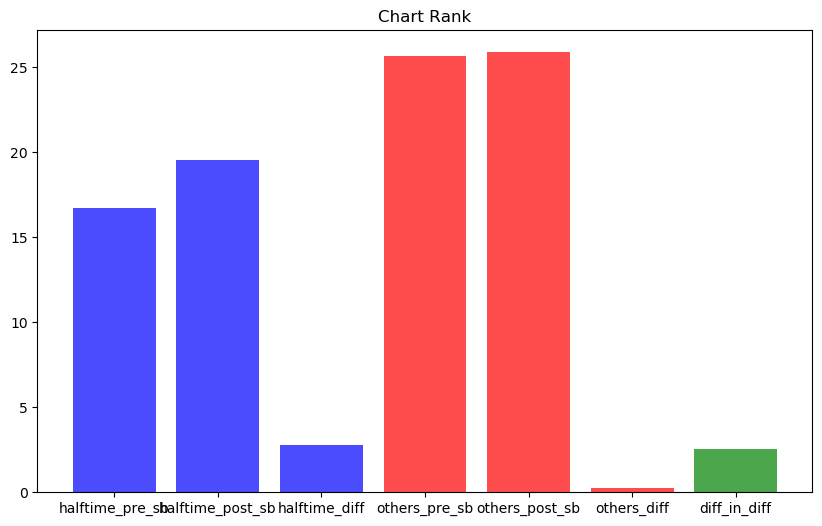

In [88]:
#sb_performers = sb_performers.T
ht = ['halftime_pre_sb', 'halftime_post_sb', 'halftime_diff']
ot = ['others_pre_sb', 'others_post_sb', 'others_diff']

sb= sb_performers[['diff_in_diff']].transpose()
sbt= sb_performers[ht].transpose()
obt = sb_performers[ot].transpose()
plt.figure(figsize=(10, 6))
plt.bar(sbt.index, sbt['rank'], color = 'blue', alpha=0.7, label='Rank')
plt.bar(obt.index, obt['rank'], color = 'red', alpha=0.7, label='Rank')
plt.bar(sb.index, sb['rank'], color = 'green', alpha=0.7, label='Rank')
plt.title('Chart Rank')
plt.savefig('..\\images\\hdd_rank.png')
plt.show()

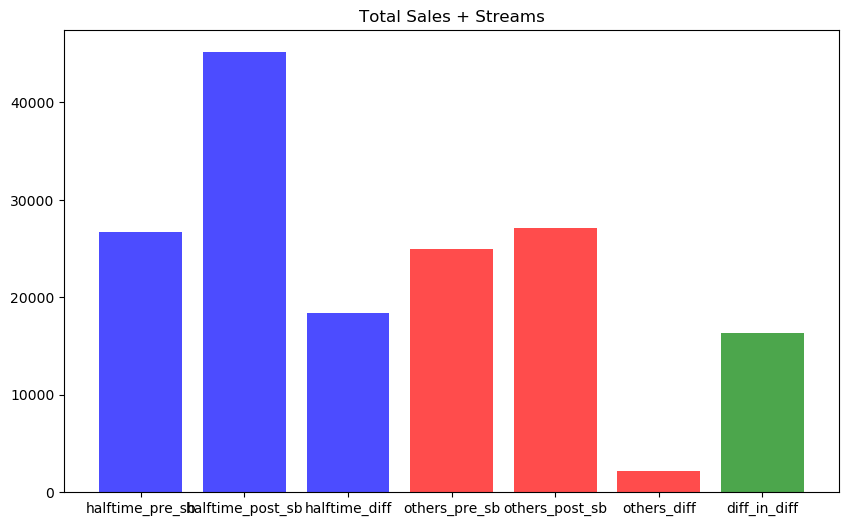

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(sbt.index, sbt['total'], color='blue', alpha=0.7, label='Total')
plt.bar(obt.index, obt['total'], color='red', alpha=0.7, label='Total')
plt.bar(sb.index, sb['total'], color='green', alpha=0.7, label='Total')
plt.title('Total Sales + Streams')
plt.savefig('..\\images\\hdd_total_sales_streams.png')
plt.show()



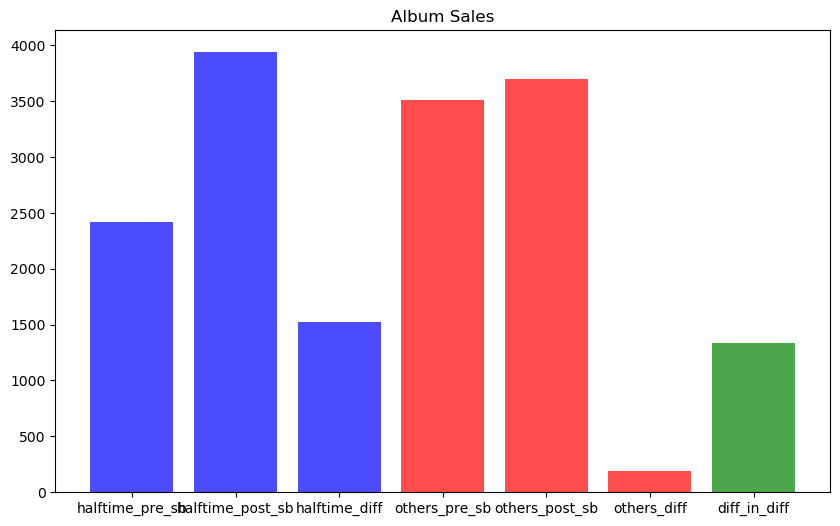

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(sbt.index, sbt['album_sales'], color='blue', alpha=0.7, label='Album Sales')
plt.bar(obt.index, obt['album_sales'], color='red', alpha=0.7, label='Album Sales')
plt.bar(sb.index, sb['album_sales'], color='green', alpha=0.7, label='Album Sales')
plt.title('Album Sales')
plt.savefig('..\\images\\hdd_album_sales.png')
plt.show()

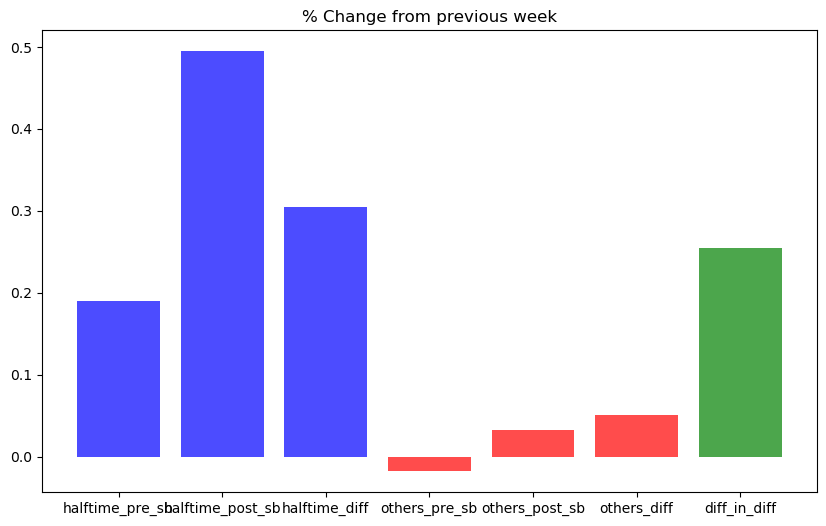

In [91]:
plt.figure(figsize=(10, 6))
plt.bar(sbt.index, sbt['change'], color='blue', alpha=0.7, label='Change')
plt.bar(obt.index, obt['change'], color='red', alpha=0.7, label='Change')
plt.bar(sb.index, sb['change'], color='green', alpha=0.7, label='Change')
plt.title('% Change from previous week')
plt.savefig('..\\images\\hdd_change.png')
plt.show()

## Artist earnings

In [21]:
songs_24 = songs[songs['year']==2024]
hdd_charts['date'] = hdd_charts['date'].apply(lambda x: x[-4:])
hdd_24 = hdd_charts[hdd_charts['date']=='2024']
streams_24 = songs_24[['name', 'streams']] 


In [26]:
artists_24 = streams_24.groupby(['name']).sum().reset_index()
artists_24['name'] = artists_24['name'].str.upper()
artists_24 = artists_24.merge(hdd_24, left_on='name', right_on='artist', how='inner')
artists_24

,name,streams,date,rank,lw,artist,label,total,change,album_sales,tea,sea,movement,post,halftime,album
0,21 SAVAGE,23098882,2024,5,2,21 SAVAGE,SLAUGHTER GANG/EPIC (SME),51449,-0.12,226,221,51002,-3,0,0,AMERICAN DREAM
1,21 SAVAGE,23098882,2024,5,2,21 SAVAGE,SLAUGHTER GANG/EPIC (SME),51449,-0.12,226,221,51002,-3,1,0,AMERICAN DREAM
2,21 SAVAGE,23098882,2024,48,46,21 SAVAGE,NaN,16492,0.03,55,27,16410,-2,0,0,HER LOSS
3,21 SAVAGE,23098882,2024,48,46,21 SAVAGE,NaN,16492,0.03,55,27,16410,-2,1,0,HER LOSS
4,BAD BUNNY,3180531,2024,25,20,BAD BUNNY,RIMAS (THE ORCHARD),22712,-0.04,72,64,22576,-5,0,0,NADIE SABE LO QUE VA A PASAR MANANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,TRAVIS SCOTT,18399108,2024,12,12,TRAVIS SCOTT,CACTUS JACK/EPIC (SME),35311,0.10,2499,99,32713,0,1,0,UTOPIA
82,ZACH BRYAN,32452137,2024,10,7,ZACH BRYAN,WARNER (WMG),42730,0.06,4097,614,38019,-3,0,0,ZACH BRYAN
83,ZACH BRYAN,32452137,2024,17,13,ZACH BRYAN,WARNER (WMG),28216,0.01,1070,261,26885,-4,0,0,AMERICAN HEARTBREAK
84,ZACH BRYAN,32452137,2024,10,7,ZACH BRYAN,WARNER (WMG),42730,0.06,4097,614,38019,-3,1,0,ZACH BRYAN


## Songs

In [39]:
half_artists = songs[songs['halftime']==1]
other_artists = songs[songs['halftime']==0]

In [42]:
sb_means = {}
other_means = {}

columns = ['rank', 'previous', 'streak', 'streams', 'movement']

for column in columns:
    sb_means[column] = half_artists[column].mean()
    other_means[column] = other_artists[column].mean()

sb = pd.DataFrame.from_dict(sb_means, orient='index', columns=['halftime'])
other = pd.DataFrame.from_dict(other_means, orient='index', columns=['others'])
performers = pd.concat([sb, other], axis=1)
performers

,halftime,others
rank,NaN,1.003043e+02
previous,NaN,4.383237e+01
streak,NaN,4.383237e+01
streams,NaN,2.826393e+06
movement,NaN,5.647189e+01


In [40]:
pre_sb_means_h = {}
post_sb_means_h = {}
pre_sb_means_o = {}
post_sb_means_o = {}

columns = ['rank', 'total', 'change', 'album_sales', 'tea', 'sea', 'movement']
cols = ['album_sales', 'tea', 'sea']
for column in columns:
    if column in cols:
        pre_sb_means_h[column] = half_artists[(half_artists['post']==0)&(half_artists['album_sales']>0)][column].mean()
        post_sb_means_h[column] = half_artists[(half_artists['post']==1)&(half_artists['album_sales']>0)][column].mean()
        pre_sb_means_o[column] = other_artists[(other_artists['post']==0)&(other_artists['album_sales']>0)][column].mean()
        post_sb_means_o[column] = other_artists[(other_artists['post']==1)&(other_artists['album_sales']>0)][column].mean()
    else:
        pre_sb_means_h[column] = half_artists[(half_artists['post']==0)][column].mean()
        post_sb_means_h[column] = half_artists[(half_artists['post']==1)][column].mean()
        pre_sb_means_o[column] = other_artists[(other_artists['post']==0)][column].mean()
        post_sb_means_o[column] = other_artists[(other_artists['post']==1)][column].mean()

pre_sb = pd.DataFrame.from_dict(pre_sb_means_h, orient='index', columns=['halftime_pre_sb'])
post_sb = pd.DataFrame.from_dict(post_sb_means_h, orient='index', columns=['halftime_post_sb'])
o_pre_sb = pd.DataFrame.from_dict(pre_sb_means_o, orient='index', columns=['others_pre_sb'])
o_post_sb = pd.DataFrame.from_dict(post_sb_means_o, orient='index', columns=['others_post_sb'])

songs_sb_performers = pd.concat([pre_sb, post_sb, o_pre_sb, o_post_sb], axis=1)
songs_sb_performers

KeyError: 'post'